In [71]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


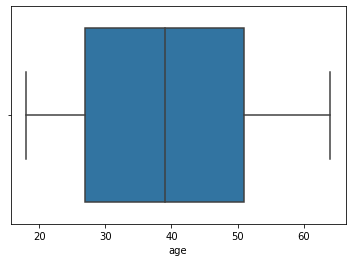

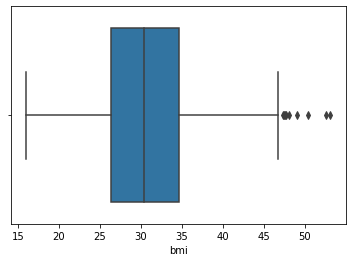

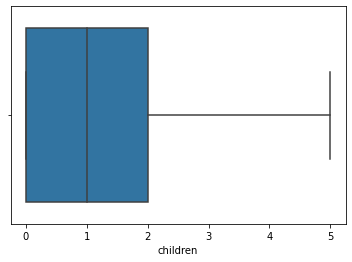

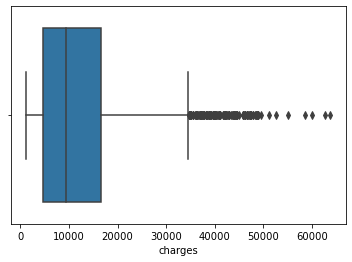

In [4]:
num_col=["age","bmi","children","charges"]
for i in num_col:
    sns.boxplot(data=df,x=i)
    plt.show()

# found outliers in charges and bmi columns

In [5]:
num=df.select_dtypes(include='number')

C:\Users\NAVEEN KUMAR REDDY.B\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


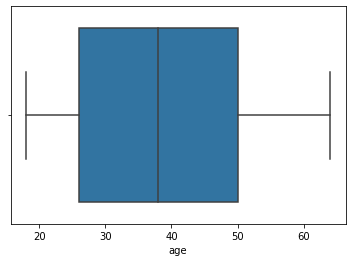

C:\Users\NAVEEN KUMAR REDDY.B\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


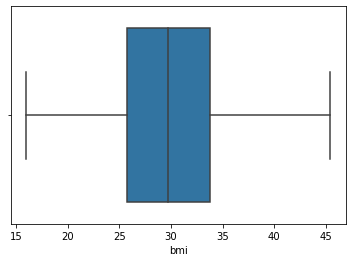

C:\Users\NAVEEN KUMAR REDDY.B\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


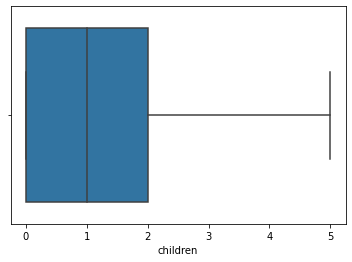

C:\Users\NAVEEN KUMAR REDDY.B\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


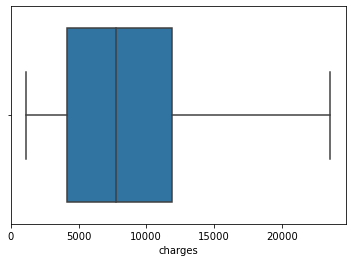

In [9]:
def out(col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3-q1
    lb = q1-(1.5*IQR)
    ub = q3+(1.5*IQR)

    outliers = df[(df[col]<lb)|(df[col]>ub)].index
    return outliers
for i in num:
    df.drop(out(i),inplace=True)
    sns.boxplot(df[i])
    plt.show()

# step 1 - defining input(X) and output(y)

In [10]:
X=df[["age","bmi","children","sex","smoker","region"]]
y=df["charges"]

# Step 2 - Splitting the Data into Train and Test 

In [11]:
import sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=0)

# Step3- Preprocessig the data

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1105 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1105 non-null   int64  
 1   sex       1105 non-null   object 
 2   bmi       1105 non-null   float64
 3   children  1105 non-null   int64  
 4   smoker    1105 non-null   object 
 5   region    1105 non-null   object 
 6   charges   1105 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 69.1+ KB


In [13]:
X_train_num=X_train.select_dtypes(include=["int64","float64"])
X_train_cat=X_train.select_dtypes(include="object")
X_test_num=X_test.select_dtypes(include=["int64","float64"])
X_test_cat=X_test.select_dtypes(include="object")

# Transforming X_train_cat 

In [14]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(drop="first",sparse=False)

In [15]:
X_train_cat_ohe=pd.DataFrame(encoder.fit_transform(X_train_cat),
                             columns=encoder.get_feature_names_out(X_train_cat.columns),index=X_train_cat.index)

# Transforming X_train_num 

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [17]:
X_train_num_rescaled=pd.DataFrame(scaler.fit_transform(X_train_num),columns=X_train_num.columns,index=X_train_num.index)

# Concating the X_train_cat_ohe and X_train_num_rescaled

In [18]:
X_train_conc=pd.concat([X_train_num_rescaled,X_train_cat_ohe],axis=1)

# Transforming X_test_cat 

In [19]:
X_test_cat_ohe=pd.DataFrame(encoder.transform(X_test_cat),columns=encoder.get_feature_names_out(X_test_cat.columns),index=X_test_cat.index)

# Transforming X_test_num 

In [20]:
X_test_num_rescaled=pd.DataFrame(scaler.transform(X_test_num),columns=X_test_num.columns,index=X_test_num.index)

# Concating the X_test_cat_ohe and X_test_num_rescaled

In [21]:
X_test_conc=pd.concat([X_test_num_rescaled,X_test_cat_ohe],axis=1)

# Step 4,5&6- Model Building,Prediction & Evaluation

# LinearRegression

In [22]:
# model building
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train_conc,y_train)
# prediction
y_test_pred=regressor.predict(X_test_conc)
# evaluation
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_test_pred)

1499.2837484856123

# KNeighborsRegressor

In [23]:
# model building
from sklearn.neighbors import KNeighborsRegressor
regressor=KNeighborsRegressor()
regressor.fit(X_train_conc,y_train)
# prediction
y_test_pred=regressor.predict(X_test_conc)
# evaluation
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_test_pred)

1979.7082227126355

# DecisionTreeRegressor

In [24]:
# model building
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
regressor.fit(X_train_conc,y_train)
# prediction
y_test_pred=regressor.predict(X_test_conc)
# evaluation
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_test_pred)

1794.6358292779782

# Support vector Regression

In [25]:
# model building
from sklearn.svm import SVR
regressor=SVR()
regressor.fit(X_train_conc,y_train)
# prediction
y_test_pred=regressor.predict(X_test_conc)
# evaluation
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_test_pred)

4470.67965087522

# RandomForestRegressor

In [26]:
# model building
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()
regressor.fit(X_train_conc,y_train)
# prediction
y_test_pred=regressor.predict(X_test_conc)
# evaluation
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_test_pred)

1466.047561289435

# GradientBoostingRegressor

In [28]:
# model building
from sklearn.ensemble import GradientBoostingRegressor
regressor=GradientBoostingRegressor()
regressor.fit(X_train_conc,y_train)
# prediction
y_test_pred=regressor.predict(X_test_conc)
# evaluation
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_test_pred)

1446.001764302357

# Conclusion:
- <font size="4"> __GradientBoostingRegressor__ </font> predicting more accuratly with least <font size="4"> __mean absolute error :1446__ </font> than any other model which we built, so we can say that this ths best fit model for prediction.
    
  

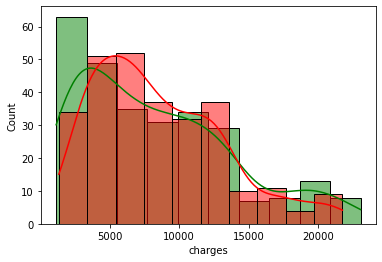

In [70]:
sns.histplot(y_test,color="green",kde=True);
sns.histplot(y_test_pred,color="red",kde=True);

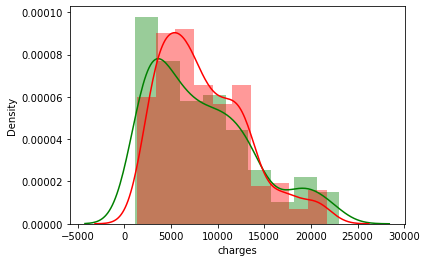

In [72]:
sns.distplot(y_test,color="green",kde=True);
sns.distplot(y_test_pred,color="red",kde=True);